In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_parquet('./data/')
df.loc[df['wave_direction'] == 'min', 'wave_direction'] = 1
df.loc[df['wave_direction'] == 'max', 'wave_direction'] = -1
df = df.astype({"wave_direction": 'float64'})

# df = df[abs(df['last_price_delta_since_stabilized']) > 1]
# df = df[abs(df['last_price_delta_since_stabilized']) < 8]

# df = df[abs(df['last_price_delta_since_stabilized']) < 10]
# df = df[abs(df['last_price_delta_since_stabilized']) > 0.2]
# df = df[df['stabilized_spread'] < 10] # nem tul nagy spread
# df = df[df['stabilized_amount_mean'] < 0.4]  # nem tul nagy tradek
# df = df[df['stabilized_nr_trades'] < 300]  # nem tul sok trade

# for col in df.columns:
#     if 'nr_trades' in col or 'price_delta' in col and not col.startswith('last'):
#         df.drop(col, axis=1, inplace=True)
# df.drop('wave_direction', axis=1, inplace=True)

# df = df[df['0_price_delta'] < 4]

df.reset_index(drop=True, inplace=True)
df

,0_amount_mean,0_nr_trades,0_price_delta,0_spread,1_amount_mean,1_nr_trades,1_price_delta,1_spread,2_amount_mean,2_nr_trades,...,past_final_price_20,past_final_price_21,past_final_price_22,past_final_price_23,past_final_price_24,past_final_price_25,past_final_price_26,past_final_price_27,past_final_price_28,past_final_price_29
0,0.0441,78.0,0.27,1.18,0.0438,79.0,0.27,1.18,0.0435,81.0,...,1.43,1.88,1.26,0.37,1.11,0.69,1.75,-0.76,0.47,0.0
1,0.0027,3.0,0.40,0.01,0.0021,4.0,0.40,0.01,0.0040,5.0,...,-2.31,-2.93,-3.82,-3.08,-3.50,-2.44,-4.95,-3.72,-4.19,0.0
2,0.0589,4.0,2.01,0.02,0.0735,6.0,1.98,0.05,0.0852,29.0,...,-7.86,-8.75,-8.01,-8.43,-7.37,-9.88,-8.65,-9.12,-4.93,0.0
3,0.0387,10.0,0.31,1.77,0.0451,11.0,0.27,1.81,0.0470,13.0,...,-12.74,-12.00,-12.42,-11.36,-13.87,-12.64,-13.11,-8.92,-3.99,0.0
4,0.0004,4.0,0.97,0.40,0.0011,5.0,0.88,0.49,0.0010,6.0,...,-12.74,-12.00,-12.42,-11.36,-13.87,-12.64,-13.11,-8.92,-3.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67873,0.0802,12.0,0.81,0.76,0.0769,13.0,0.81,0.78,0.0770,15.0,...,-7.95,-7.70,-7.62,-7.41,-3.52,2.60,3.34,4.59,-0.33,0.0
67874,0.0012,5.0,0.55,0.55,0.0011,6.0,0.55,0.68,0.0012,7.0,...,-7.95,-7.70,-7.62,-7.41,-3.52,2.60,3.34,4.59,-0.33,0.0
67875,0.0082,20.0,0.39,1.23,0.0257,57.0,0.39,2.92,0.0203,76.0,...,-6.22,-6.14,-5.93,-2.04,4.08,4.82,6.07,1.15,1.48,0.0
67876,0.0081,6.0,0.44,0.63,0.0071,7.0,0.44,0.63,0.0066,8.0,...,-7.54,-7.33,-3.44,2.68,3.42,4.67,-0.25,0.08,-1.40,0.0


In [3]:
# sns.scatterplot(x=df['4_nr_trades'], y=abs(df.last_price_delta_since_stabilized))

a = df.corr().last_price_delta_since_stabilized * 1000
a.sort_values(axis=0, ascending=False)

last_price_delta_since_stabilized    1000.000000
wave_direction                        589.382965
past_final_price_28                   557.525735
past_final_price_27                   455.585805
past_final_price_26                   391.088262
past_final_price_25                   350.038700
past_final_price_24                   313.153722
past_final_price_23                   282.612390
past_final_price_22                   269.252287
past_final_price_21                   250.460793
past_final_price_20                   239.066242
past_final_price_19                   231.960310
past_final_price_18                   218.522704
past_final_price_17                   205.689229
past_final_price_16                   199.983666
past_final_price_15                   191.052369
past_final_price_14                   183.308871
past_final_price_13                   183.053128
past_final_price_12                   176.232071
past_final_price_11                   170.549498
past_final_price_10 

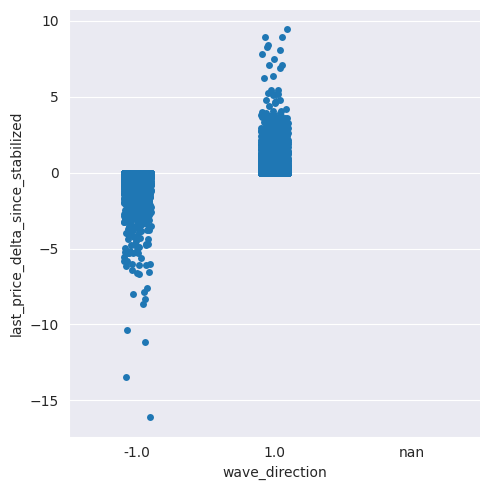

In [6]:
# df.wave_direction.mean()
sns.catplot(x=df.wave_direction, y=df.last_price_delta_since_stabilized)


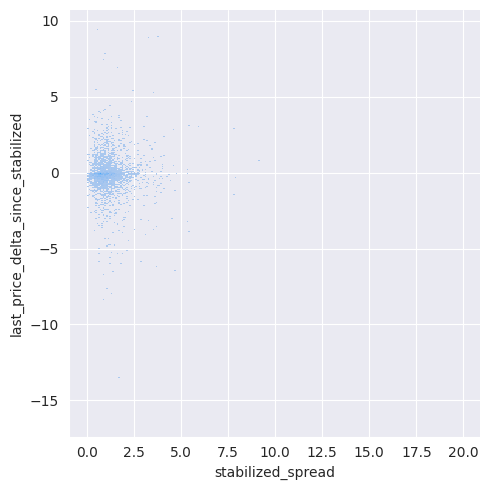

In [4]:
sns.displot(y=df.last_price_delta_since_stabilized, x=df.stabilized_spread)


<AxesSubplot: xlabel='past_final_price_0', ylabel='last_price_delta_since_stabilized'>

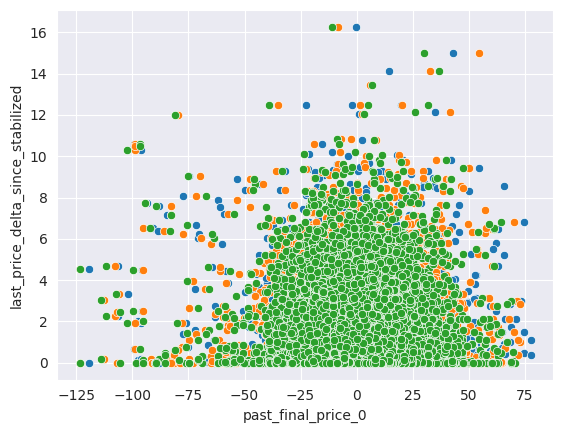

In [6]:
sns.scatterplot(x=df['past_final_price_0'], y=abs(df.last_price_delta_since_stabilized))
sns.scatterplot(x=df['past_final_price_1'], y=abs(df.last_price_delta_since_stabilized))
sns.scatterplot(x=df['past_final_price_2'], y=abs(df.last_price_delta_since_stabilized))

